In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
# Create a 5 Hz sine wave

waveFreq = 5 #Hz
sampleFreq = 1000 # Hz
cycles = 20
t = np.linspace(0, cycles / waveFreq, int(cycles*sampleFreq/waveFreq))    # Generate sin wave for 10 cycles
wave = np.sin(2*np.pi*waveFreq*t)

Text(0.5, 1.0, '5 Hz sin wave sampled at 1000 Hz for 20 cycles')

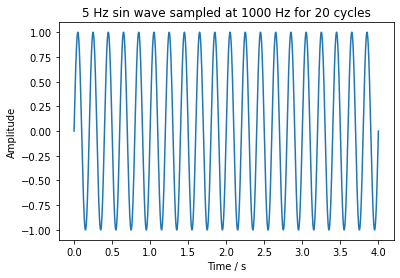

In [69]:
plt.plot(t, wave)
plt.xlabel("Time / s")
plt.ylabel("Amplitude")
plt.title(f"{waveFreq} Hz sin wave sampled at {sampleFreq} Hz for {cycles} cycles")

In [70]:
# wave[:4000] = 0
# wave[-4500:] = 0
# plt.plot(t, wave)

Text(0.5, 0, 'Freq / Hz')

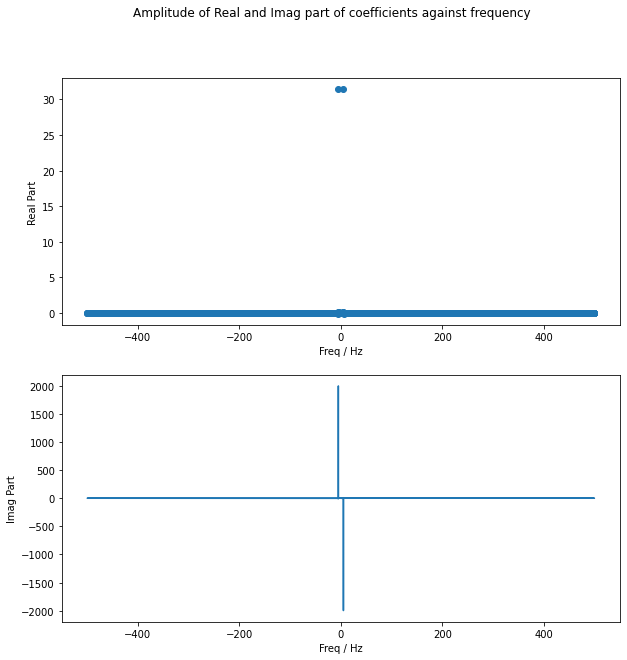

In [80]:
# DFT Analysis

fig, axs = plt.subplots(nrows=2, figsize=(10,10))
fig.suptitle("Amplitude of Real and Imag part of coefficients against frequency")
 
sp = np.fft.fft(wave)        # Fourier coefficients (complex)
freqBins = np.fft.fftfreq(len(wave), 1/sampleFreq)   # Freq bins

axs[0].scatter(freqBins, sp.real)      # NOTE: Could also plot sp.imag, but it shd be the same as the real part??
axs[0].set_ylabel("Real Part")
axs[0].set_xlabel("Freq / Hz")

axs[1].plot(freqBins, sp.imag)
axs[1].set_ylabel("Imag Part")
axs[1].set_xlabel("Freq / Hz")

Peak Freq at 5.00 Hz



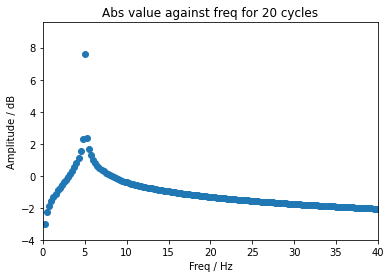

In [79]:
# Plot the absolute values of the +ve freq

# Remove -ve freq
freqBins = freqBins[:len(freqBins)//2]
sp = sp[:len(sp)//2]

# Take the absolut value of sp
sp = np.absolute(sp)

plt.scatter(freqBins, np.log(sp))
plt.xlim(0, 8*waveFreq)
plt.ylim(-4)
plt.title(f"Abs value against freq for {cycles} cycles")
plt.xlabel("Freq / Hz")
plt.ylabel("Amplitude / dB")

print(f"Peak Freq at {freqBins[np.argmax(sp)]:.2f} Hz\n")

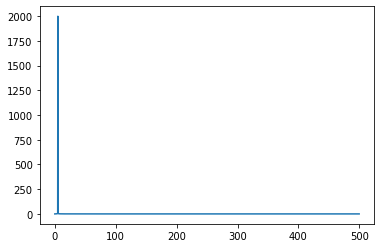

In [73]:
plt.plot(freqBins, sp)

Text(0.5, 1.0, 'Normalised Hamming Window Function')

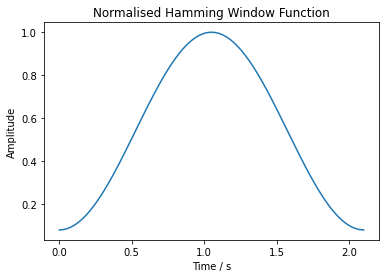

In [241]:
# Choose a window function from Numpy
# barlett, blackman, hamming, hanning, kaiser

# hanning
window = "Hamming"
window_f = np.hamming(len(wave))
plt.plot(t, window_f)
plt.xlabel("Time / s")
plt.ylabel("Amplitude")
plt.title(f"Normalised {window} Window Function")

Text(0.5, 1.0, 'Hamming window for 5 Hz sin wave sampled at 300 Hz for 10.5 cycles')

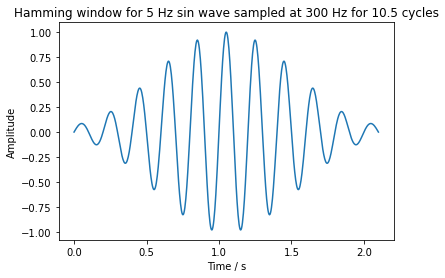

In [242]:
# Apply window function

window_wave = window_f*wave

plt.plot(t, window_wave)
plt.xlabel("Time / s")
plt.ylabel("Amplitude")
plt.title(f"{window} window for {waveFreq} Hz sin wave sampled at {sampleFreq} Hz for {cycles} cycles")

Text(0.5, 0, 'Freq / Hz')

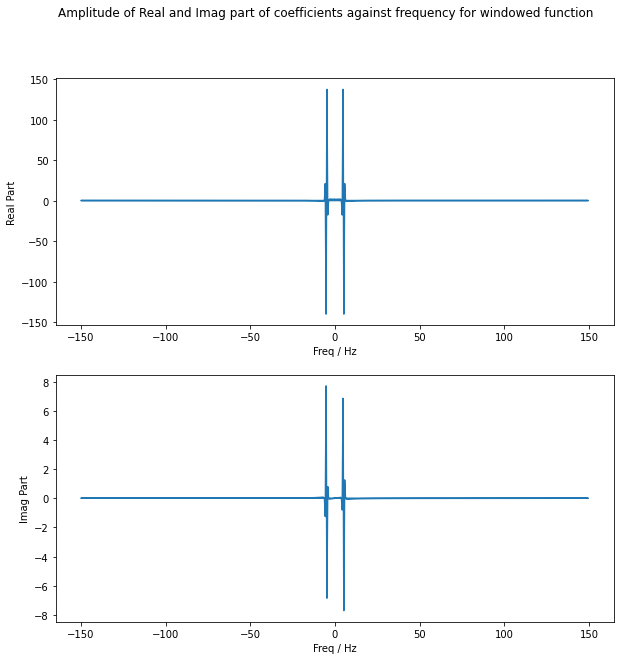

In [243]:
# Perform DFT and plot abs value

# DFT Analysis

fig, axs = plt.subplots(nrows=2, figsize=(10,10))
fig.suptitle("Amplitude of Real and Imag part of coefficients against frequency for windowed function")
 
sp_window = np.fft.fft(window_wave)        # Fourier coefficients (complex)
freqBins = np.fft.fftfreq(len(window_wave), 1/sampleFreq)   # Freq bins

axs[0].plot(freqBins, sp_window.real)      # NOTE: Could also plot sp.imag, but it shd be the same as the real part??
axs[0].set_ylabel("Real Part")
axs[0].set_xlabel("Freq / Hz")

axs[1].plot(freqBins, sp_window.imag)
axs[1].set_ylabel("Imag Part")
axs[1].set_xlabel("Freq / Hz")

Peak Freq at 5.24 Hz



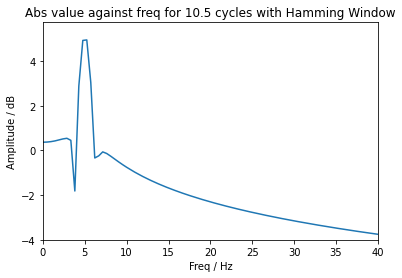

In [244]:
# Plot the absolute values of the +ve freq

# Remove -ve freq
freqBins = freqBins[:len(freqBins)//2]
sp_window = sp_window[:len(sp_window)//2]

# Take the absolut value of sp
sp_window = np.absolute(sp_window)

plt.plot(freqBins, np.log(sp_window))
plt.xlim(0, waveFreq*8)
plt.ylim(-4)
plt.title(f"Abs value against freq for {cycles} cycles with {window} Window")
plt.xlabel("Freq / Hz")
plt.ylabel("Amplitude / dB")

print(f"Peak Freq at {freqBins[np.argmax(sp_window)]:.2f} Hz\n")